In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('https://extranet.who.int/tme/generateCSV.asp?ds=mdr_estimates')
df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_rr_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,source_rr_ret,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi,e_rr_in_notified_labconf_pulm,e_rr_in_notified_labconf_pulm_lo,e_rr_in_notified_labconf_pulm_hi
0,Afghanistan,AF,AFG,4,EMR,2015,Model,4.8,0.42,19.0,Surveillance,6.0,4.1,8.3,3400,0,9800,800.0,70.0,3100.0
1,Afghanistan,AF,AFG,4,EMR,2016,Model,4.7,0.45,17.0,Surveillance,8.1,6.1,10.0,3400,0,9500,880.0,0.0,2400.0
2,Afghanistan,AF,AFG,4,EMR,2017,Model,4.6,0.48,17.0,Surveillance,11.0,9.0,13.0,3400,0,9500,1100.0,0.0,2700.0
3,Afghanistan,AF,AFG,4,EMR,2018,Model,4.5,0.51,17.0,Surveillance,14.0,13.0,16.0,3500,0,9800,1200.0,0.0,2900.0
4,Afghanistan,AF,AFG,4,EMR,2019,Model,4.4,0.53,17.0,Surveillance,19.0,17.0,20.0,3500,0,9900,1200.0,0.0,3200.0


In [7]:
df.describe()

,iso_numeric,year,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi,e_rr_in_notified_labconf_pulm,e_rr_in_notified_labconf_pulm_lo,e_rr_in_notified_labconf_pulm_hi
count,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1720.000000,1671.000000,1671.000000,1671.000000
mean,433.200000,2018.500000,3.725372,2.670122,5.972331,17.135081,9.695064,32.208314,2146.234884,1319.488372,3002.373837,827.956912,728.868342,941.589467
std,252.706567,2.291954,5.751976,5.744386,6.282718,13.873184,13.957301,23.161549,10025.069033,7430.315663,12814.094160,3897.739022,3758.948945,4063.579477
min,4.000000,2015.000000,0.260000,0.090000,0.440000,0.730000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,212.000000,2016.750000,1.300000,0.340000,2.300000,8.075000,1.200000,13.000000,4.000000,0.000000,6.000000,2.000000,0.000000,3.000000
50%,434.000000,2018.500000,2.100000,0.920000,3.700000,14.000000,4.300000,25.000000,61.000000,13.000000,100.000000,32.000000,10.000000,45.000000
75%,646.000000,2020.250000,3.300000,2.100000,7.200000,21.000000,11.000000,49.000000,600.000000,220.000000,1200.000000,240.000000,130.000000,360.000000
max,894.000000,2022.000000,40.000000,38.000000,41.000000,100.000000,99.000000,100.000000,140000.000000,100000.000000,180000.000000,52000.000000,50000.000000,53000.000000


In [8]:
import statistics

df_wzrost = pd.read_csv('Wzrost.csv', header=None)
wariancja = statistics.variance(df_wzrost)
std = statistics.stdev(df_wzrost)
print(f'Wariancja: {wariancja} | Odchylenie standardowe: {std}')

Wariancja: 28.5 | Odchylenie standardowe: 5.338539126015656


In [13]:
import pandas as pd
from scipy import stats

df_picie = pd.read_csv("napoje.csv", delimiter=';')
df_picie.head()

,mies,rok,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,2001,108447,43302,186385,54301,45065,227013,56306
1,2,2001,105439,46711,168782,68131,43933,221115,67212
2,3,2001,111675,36029,172186,63104,46663,222812,67398
3,4,2001,113232,33659,172445,50871,45195,238631,57100
4,5,2001,110274,40853,174526,67924,47926,222963,65001


In [19]:
stat, p_value = stats.shapiro(df_picie['okocim'])
modal = stats.mode(df_picie['okocim'])
kurtoza = stats.kurtosis(df_picie['okocim'])
opis = stats.describe(df_picie['okocim'])
skosnosc = stats.skew(df_picie['okocim'])
print(f'Test Shapiro-Wilka:\nStatystyka testowa: {stat}\nP-wartość: {p_value}\n')
print(f'Modalna wartość: {modal}\nKurtoza: {kurtoza}\nSkośność: {skosnosc}')


Test Shapiro-Wilka:
Statystyka testowa: 0.9875098466873169
P-wartość: 0.08890535682439804

Modalna wartość: ModeResult(mode=61350, count=2)
Kurtoza: -0.13690868066813833
Skośność: -0.3548695724535526


In [27]:
df_brain = pd.read_csv('brain_size.csv', delimiter=';')
df_brain.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [30]:
viq_mean = df_brain['VIQ'].mean()
print(f'Średnia wartość kolumny "VIQ": {viq_mean}')

Średnia wartość kolumny "VIQ": 112.35


In [33]:
gender_count = df_brain['Gender'].value_counts()
gender_count

Gender
Female    20
Male      20
Name: count, dtype: int64

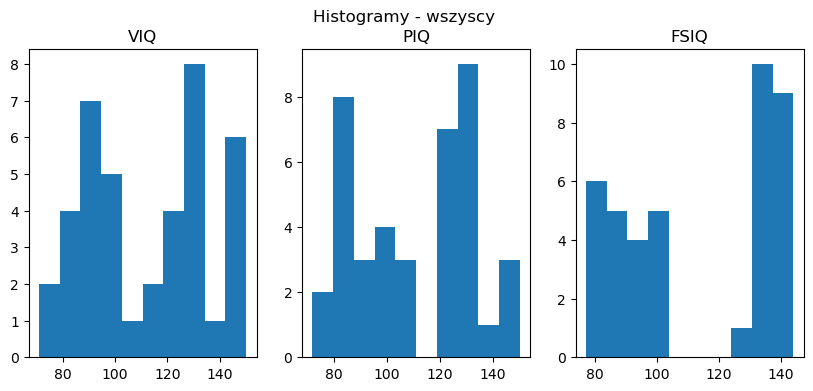

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.suptitle('Histogramy - wszyscy')
plt.subplot(1,3,1)
plt.hist(df_brain['VIQ'])
plt.title('VIQ')

plt.subplot(1,3,2)
plt.hist(df_brain['PIQ'])
plt.title('PIQ')

plt.subplot(1,3,3)
plt.hist(df_brain['FSIQ'])
plt.title('FSIQ')

plt.show()

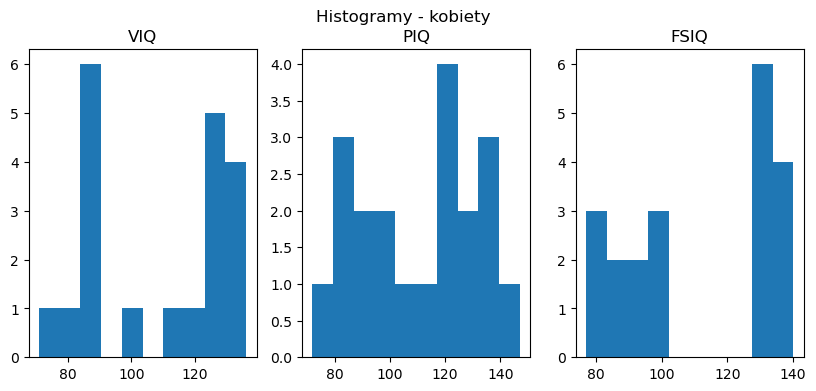

In [44]:
df_female = df_brain[df_brain['Gender'] == 'Female']

plt.figure(figsize=(10,4))
plt.suptitle('Histogramy - kobiety')
plt.subplot(1,3,1)
plt.hist(df_female['VIQ'])
plt.title('VIQ')

plt.subplot(1,3,2)
plt.hist(df_female['PIQ'])
plt.title('PIQ')

plt.subplot(1,3,3)
plt.hist(df_female['FSIQ'])
plt.title('FSIQ')

plt.show()